## Project 5: Iphone Purchase

Objectice: To predict whether a customer will purchase an Iphone from their store given their gender, age and salary.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv('D:/Data Science/TOPMENTOR-DS/Machine Learning/KNN Assignment-Project 5 and 6/iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [14]:
# make a copy of data'
df=data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [15]:
df.info

<bound method DataFrame.info of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [16]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

There are no null values in the data

In [19]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


1. Minimum age is 18 years while maximum age is 60 years
2. Minimum salary is 15k while maximum salary is 150k

In [26]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
So, the number of females are higher than the males.

In [40]:
df[(df['Gender']=='Female') & (df['Purchase Iphone']==1)]['Gender'].count()

77

Out of 204, 77 females have purchased Iphones

In [42]:
df[(df['Gender']=='Male') & (df['Purchase Iphone']==1)]['Gender'].count()

66

Out of 196, 66 males have purchased Iphones

### Exploratory Data Analysis (EDA)

In [17]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

Text(0.5, 1.0, '# of genders')

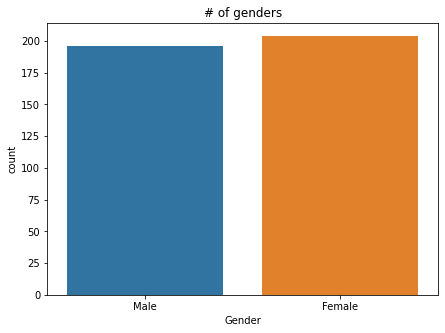

In [117]:
# Number of Males and Females in the data
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',data=df) 
plt.savefig('total gender.jpg',bbox_inches='tight',dpi=200)
plt.title('# of genders')

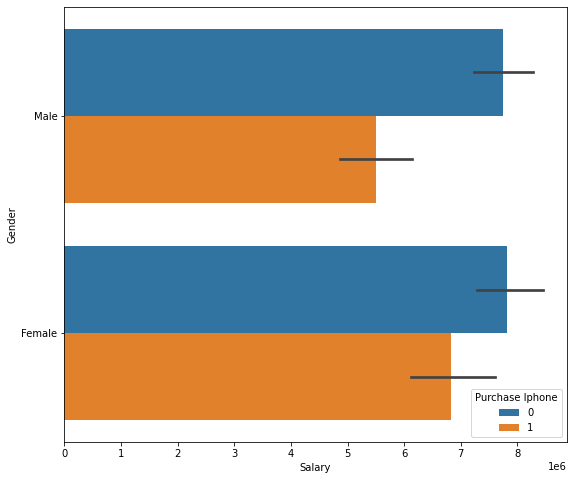

In [153]:
# gender and salary wise Iphone purchase
plt.figure(figsize=(9,8))
sns.barplot(data=df,x='Salary',y='Gender',estimator=sum,hue='Purchase Iphone')
plt.savefig('gender-salary wise Iphone.jpg',bbox_inches='tight',dpi=200)
#plt.title('# of genders')

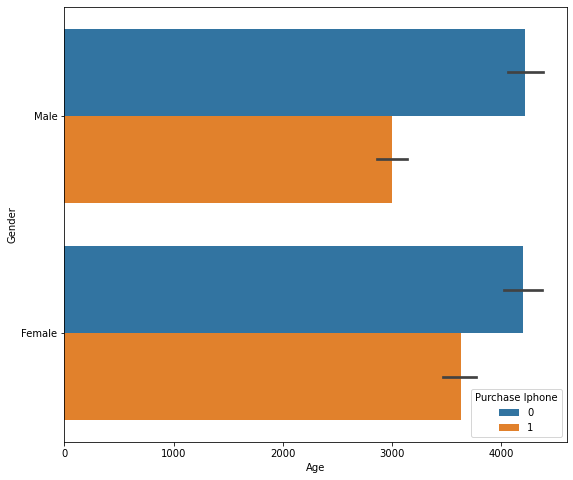

In [154]:
# gender and Age wise Iphone purchase
plt.figure(figsize=(9,8))
sns.barplot(data=df,x='Age',y='Gender',estimator=sum,hue='Purchase Iphone')
plt.savefig('gender-age wise Iphone.jpg',bbox_inches='tight',dpi=200)
#plt.title('# of genders')

In [129]:
gender_values=df.Gender.value_counts().values
gender_values

array([204, 196], dtype=int64)

In [131]:
gender_names=df.Gender.value_counts().index
gender_names

Index(['Female', 'Male'], dtype='object')

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_8852\976801059.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Pie-Gender.jpg',bb_box="tight",dpi=200)


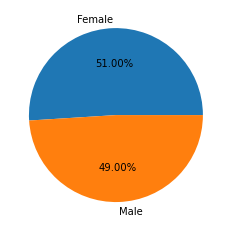

In [134]:
# Pie chart for male and female percentage
plt.pie(gender_values,labels=gender_names,autopct="%1.2f%%")
plt.savefig('Pie-Gender.jpg',bb_box="tight",dpi=200)

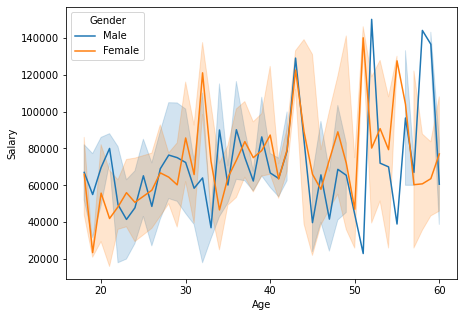

<Figure size 432x288 with 0 Axes>

In [157]:
# Age wise salary of male and females
plt.figure(figsize=(7,5))
sns.lineplot(x='Age', y='Salary', hue='Gender', data=df)
plt.show()
plt.savefig('age wise salary.jpg',bbox_inches='tight',dpi=200)

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


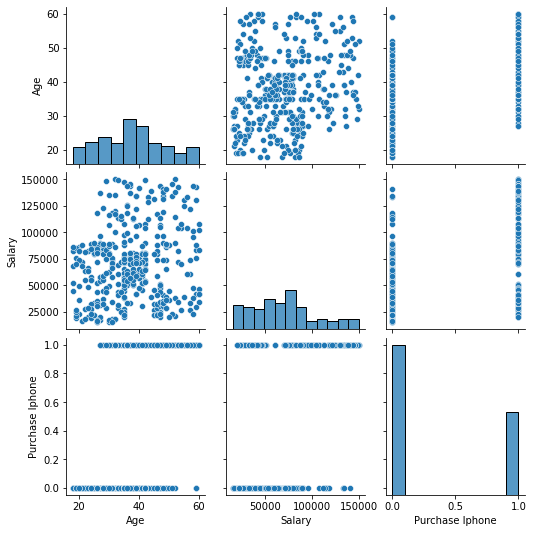

In [46]:
# correlation between the columns
sns.pairplot(df)
df.corr()

1. Age is more correlated with the purchase of Iphone.
2. Salary is also correlated with the purchase of Iphone.

Text(0.5, 1.0, 'Age box plot')

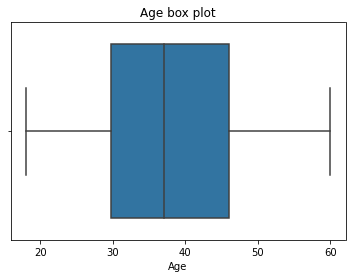

In [49]:
# Box plot to check outlier in Age data
sns.boxplot(x=df['Age'])
plt.savefig('Age box plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Age box plot')

No outliers are present in Age data

Text(0.5, 1.0, 'Salary box plot')

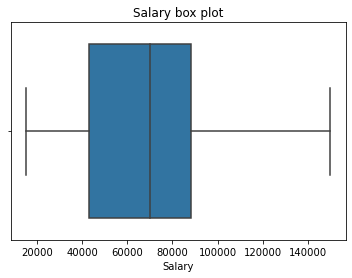

In [50]:
# Box plot to check outlier in Salary data
sns.boxplot(x=df['Salary'])
plt.savefig('Salary box plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Salary box plot')

No outliers are present in Salary data

The skewness of salary data is : 0.5


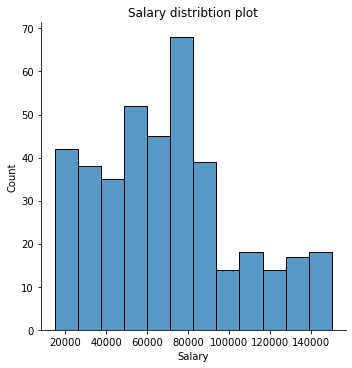

In [59]:
# Distribution plot to check skewness in Salary data
sns.displot(x=df['Salary'])
plt.savefig('Salary distribution plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Salary distribtion plot')
print('The skewness of salary data is :', round(df['Salary'].skew(),2))

The skewness is : 0.23


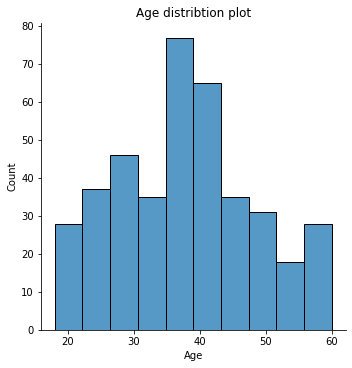

In [58]:
# Distribution plot to check skewness in Age data
sns.displot(x=df['Age'])
plt.savefig('Age distribution plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Age distribtion plot')
print('The skewness is :', round(df['Age'].skew(),2))


both the salary and Age data are normally distributed with skewness around 0.50 and 0.23, repectively

Encoding : 
1. The data has column as gender which is a categorical independent column. 
2. This categorical feature should be converted to some integral values via one hot encoding method.

In [60]:
# One hot encoding
df_gender=pd.get_dummies(df['Gender']).astype('int')
df_gender.head(2)

,Female,Male
0,0,1
1,0,1


In [61]:
# lets concatenate the two data sets
df1=pd.concat([df,df_gender],axis=1)
df1.head(2)

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1


### Model: KNN Regression

---------Sampling of data-------------

In [62]:
df1.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone', 'Female', 'Male'], dtype='object')

In [64]:
x=df1[['Age', 'Salary', 'Female', 'Male']]
y=df1['Purchase Iphone']

In [65]:
# standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [66]:
x_sc=sc.fit_transform(x)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2, random_state=1)

In [69]:
x_train.shape,x_test.shape

((320, 4), (80, 4))

----------------Model Building--------------

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
clf=KNeighborsClassifier(n_neighbors=3)

In [75]:
clf_fit=clf.fit(x_train,y_train)

-----------Model Prediction---------------

In [76]:
pred=clf_fit.predict(x_test)

In [77]:
pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [79]:
dd=pd.DataFrame(pred,columns=['predicted'])
dd['Actual']=y_test.values
dd.head()

,predicted,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,0


---------------Error Calculation-------------


In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Model: KNN Regression')

print('The accuracy of the model is:',accuracy_score(dd['Actual'],dd['predicted']))
print('The confusion matrix is :',confusion_matrix(dd['Actual'],dd['predicted']))
print('The confusion matrix is :\n',classification_report(dd['Actual'],dd['predicted']))
      


Model: KNN Regression
The accuracy of the model is: 0.85
The confusion matrix is : [[39  9]
 [ 3 29]]
The confusion matrix is :
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80



<AxesSubplot:>

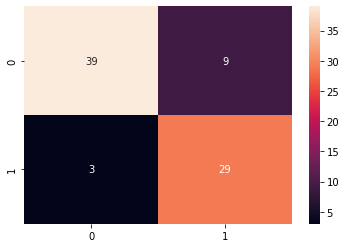

In [83]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

----------------Choosing a K value--------------

In [85]:
error=[]
for i in range(1,31):     ## considering k values from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error.append(1-accuracy_score(y_test,predict_i))   ## 1-accuracy is error

In [86]:
error

[0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.13749999999999996,
 0.13749999999999996,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.09999999999999998,
 0.09999999999999998,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.125,
 0.125,
 0.125,
 0.13749999999999996,
 0.125]

C:\Users\Shipra Choudhary\AppData\Local\Temp\ipykernel_8852\1365432693.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Error-K value plot.jpg', bb_box='tight', dpi=200)


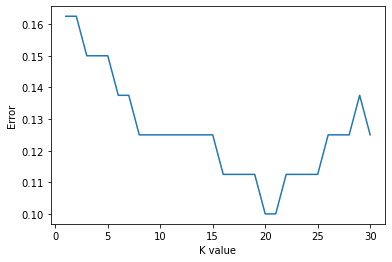

In [122]:
# plotting error for different k values
plt.plot(range(1,31),error)
plt.xlabel('K value')
plt.ylabel('Error')
plt.savefig('Error-K value plot.jpg', bb_box='tight', dpi=200)

Here, for k=20 the error is least so, we will substitute this k value in the model 

In [143]:
clf_new=KNeighborsClassifier(n_neighbors=20)

In [144]:
clf_new_fit=clf_new.fit(x_train,y_train)
pred_new=clf_new_fit.predict(x_test)

In [145]:
print('Model: KNN Regression')
print('The accuracy of the model is:',accuracy_score(pred_new,y_test))
print('The confusion matrix is :',confusion_matrix(pred_new,y_test))
print('The confusion matrix is :\n',classification_report(pred_new,y_test))
      

Model: KNN Regression
The accuracy of the model is: 0.9
The confusion matrix is : [[42  2]
 [ 6 30]]
The confusion matrix is :
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.94      0.83      0.88        36

    accuracy                           0.90        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.90      0.90      0.90        80



The accuracy score is improved much on choosing k value 20

------------Saving the model-------------

In [99]:
import joblib

In [101]:
file_name='iphone_prj5.sav'

In [103]:
joblib.dump(clf_new_fit,file_name)

['iphone_prj5.sav']